# 图6 边缘直方图

边缘直方图具有沿x轴和y轴变量的直方图，可以用于可视化x和y之间的关系以及x和y的单变量分布，经常用于探索性数据分析(EDA)。

原代码运行警告`UserWarning: FixedFormatter should only be used together with FixedLocator`，应该`import matplotlib.ticker as mticker`

D:\code\platform\Deep-Learning-Framework\doc\Plot\require.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


1.23.5
2.0.0
3.7.1
0.12.2


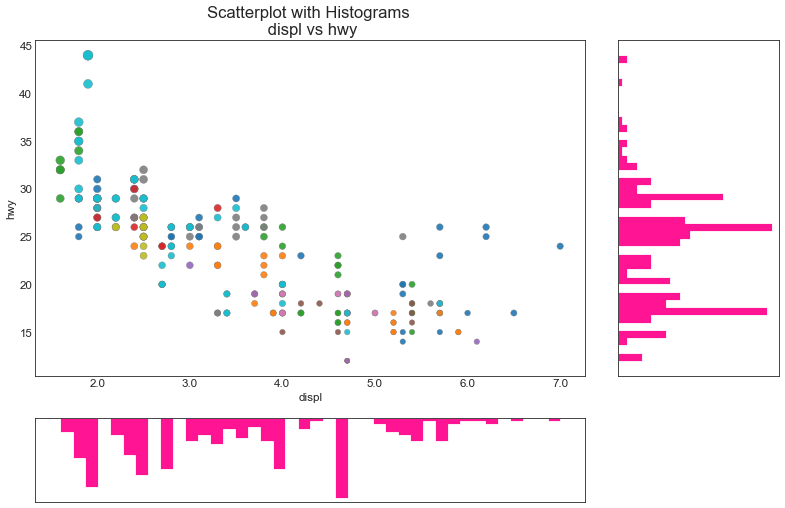

In [1]:
from doc.Plot.require import *

import matplotlib.ticker as mticker

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
# df = pd.read_csv("../data/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi=60)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty * 4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df,
                cmap="tab10", edgecolors='gray', linewidths=0.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

label_format = '{:,.1f}'
x_labels = ax_main.get_xticks().tolist()
ax_main.xaxis.set_major_locator(mticker.FixedLocator(x_labels))
ax_main.set_xticklabels([label_format.format(x) for x in x_labels])
plt.show()